In [1]:
import pandas as pd

input_csv = r'C:\Users\anura\Downloads\cs202_miner\cs202_miner\butterknife_results\commits_info.csv'  
output_csv = "commits_info_with_match.csv"  

df = pd.read_csv(input_csv)

df['match'] = df.apply(lambda row: "Yes" if row['diff_myers'] == row['diff_histogram'] else "No", axis=1)

df.to_csv(output_csv, index=False)

print(f"Dataset updated with 'match' column and saved to {output_csv}")


Dataset updated with 'match' column and saved to commits_info_with_match.csv


In [2]:
print(df[df['match'] == 'Yes'].shape[0])
df['match'].size


2334


2483

In [7]:
import matplotlib.pyplot as plt

# Matches for non-code artifacts: 544
# No matches for non-code artifacts: 13
# Matches for code artifacts: 1571
# No matches for code artifacts: 136


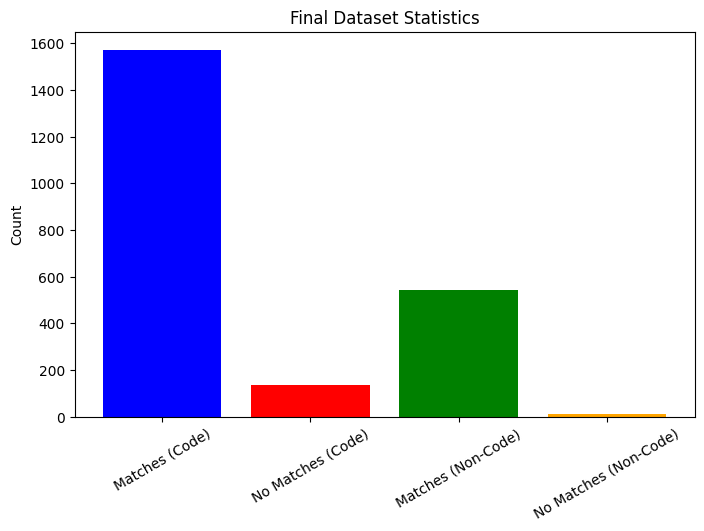

In [ ]:
code_extensions = {'.java', '.html', '.kt'}  # Only these programming languages are used
non_code_extensions = {'.md', '.txt', '.css'}

def classify_artifact(path):
    if not isinstance(path, str) or path in ["N/A", "nan"]:  
        return "unknown"
    return 'code' if any(path.endswith(ext) for ext in code_extensions) else 'non-code'

df['old_file_path'] = df['old_file_path'].astype(str)  # Convert all to string
df['artifact_type'] = df['old_file_path'].apply(classify_artifact)

df = df[df['artifact_type'] != 'unknown']

matches_code = df[(df['match'] == 'Yes') & (df['artifact_type'] == 'code')].shape[0]
no_matches_code = df[(df['match'] == 'No') & (df['artifact_type'] == 'code')].shape[0]
matches_non_code = df[(df['match'] == 'Yes') & (df['artifact_type'] == 'non-code')].shape[0]
no_matches_non_code = df[(df['match'] == 'No') & (df['artifact_type'] == 'non-code')].shape[0]

# Print the statistics
print(f"# Matches for non-code artifacts: {matches_non_code}")
print(f"# No matches for non-code artifacts: {no_matches_non_code}")
print(f"# Matches for code artifacts: {matches_code}")
print(f"# No matches for code artifacts: {no_matches_code}")

# Plot bar chart
labels = ["Matches (Code)", "No Matches (Code)", "Matches (Non-Code)", "No Matches (Non-Code)"]
values = [matches_code, no_matches_code, matches_non_code, no_matches_non_code]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'red', 'green', 'orange'])
plt.ylabel("Count")
plt.title("Final Dataset Statistics")
plt.xticks(rotation=30)
plt.show()
